In [14]:
from os import listdir
from os.path import isfile, join
import numpy as np
import nibabel as nib
from scipy import ndimage as ndi
from dipy.data import get_sphere
from dipy.align.reslice import reslice
from dipy.reconst.dsi import DiffusionSpectrumModel
from dipy.viz import window, actor
import matplotlib.pyplot as plt

In [22]:
def features(img):
    img_data = img.get_fdata()
    print('xyzt units:', img.header.get_xyzt_units())
    print('Pixel value range: %d, %d' %
          (np.min(img_data), np.max(img_data)))
    print('data.shape: ', img_data.shape)
    # It can be seen that this dataset has anisotropic voxel sizes,
    # therefore reslicing is necessary
    affine = img.affine
    #print('affine:', affine)
    # Read the voxel size from the image header
    voxel_size = img.header.get_zooms()[:3]
    print('Voxel size:', voxel_size)
    print('\n')
    return img_data, voxel_size

In [25]:
dirs = ['./sample_data/',
        './sample_data/',
        './sample_data/']
files = [f for f in listdir(dirs[0]) if isfile(join(dirs[0], f))]
files = [f for f in files if ('nii' in f)]

axial1 = nib.load(dirs[0]+files[0])
axial2 = nib.load(dirs[1]+files[1])
Coronal = nib.load(dirs[2]+files[2])

print('Axial view 1')
axial1_data, axial1_voxel = features(axial)
print('Axial view 2')
axial2_data, axial2_voxel = features(coronal)
print('Coronal view 1')
coronal_data, Coronal_voxel = features(Coronal)

axial1_new_voxel = (.4, .4, .4)
axial2_new_voxel = (.4, .4, .4)
coronal_new_voxel = (.4, .4, .4)

axial1_affine = axial1.affine
axial2_affine = axial2.affine
coronal_affine = coronal.affine

axial1_data, axial1_affine = reslice(axial1_data, axial1_affine,
                         axial1_voxel, axial1_new_voxel)
axial2_data, axial2_affine = reslice(axial2_data, axial2_affine,
                         axial2_voxel, axial2_new_voxel)
coronal_data, coronal_affine = reslice(coronal_data, coronal_affine,
                         coronal_voxel, coronal_new_voxel)

Axial view 1
xyzt units: ('mm', 'sec')
Pixel value range: 0, 2281
data.shape:  (512, 512, 7)
Voxel size: (0.44921875, 0.44921875, 6.5000005)


Axial view 2
xyzt units: ('mm', 'sec')
Pixel value range: 0, 2854
data.shape:  (512, 512, 13)
Voxel size: (0.44921875, 0.44921875, 6.4999986)


Coronal view 1
xyzt units: ('mm', 'sec')
Pixel value range: 0, 2874
data.shape:  (512, 512, 32)
Voxel size: (0.44921875, 0.44921875, 4.4999986)




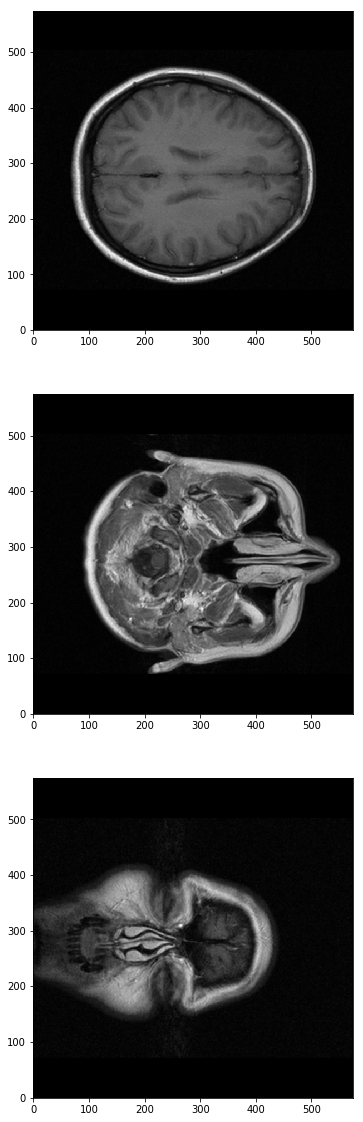

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax[0].imshow(axial1_data[:, :, 4],
             cmap='gray', origin='lower')
ax[1].imshow(axial2_data[:, :, 4],
             cmap='gray', origin='lower')
ax[2].imshow(coronal_data[:, :, 4],
             cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')